# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


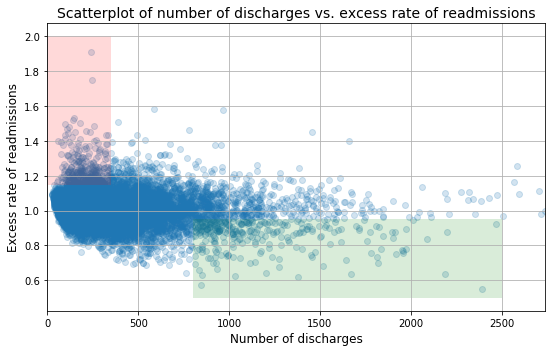

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


# Do you agree with the above analysis and recommendations? Why or why not?

### A. Initial observations based on the plot above
•Overall, rate of readmissions is trending down with increasing number of discharges

•With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

•With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

#### <span style="color:green"> Answer: It seems from the preliminary plot that there may be correlation between the discharge number and excessive rate of readmission. However, there is no statistical anaylsis to demonstrate such trend. Therefore, I do not agree with such conclusion prior to further statistiacal analysis.

### B. Statistics
•In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

•In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

#### <span style="color:green"> Answer: We need to run some calculations to verfiy if this is correct.

In [6]:
# extract data with number of discharges < 100 and those with discharge >1000
df=clean_hospital_read_df
df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate',
                         'Number of Readmissions'], inplace=True)
df_1000 = df[df['Number of Discharges']> 1000]
less_100 = df[df['Number of Discharges']< 100]

In [7]:
mean_less_100=less_100['Excess Readmission Ratio'].mean()
mean_df_1000=df_1000['Excess Readmission Ratio'].mean()
excess_rate_less_100=np.sum(less_100['Excess Readmission Ratio']>1)/len(less_100)*100
excess_rate_gt_1000=np.sum(df_1000['Excess Readmission Ratio']>1)/len(df_1000)*100
print('In hospitals/facilities with number of discharges < 100, mean excess readmission rate is %.3f and %i%% have excess readmission rate greater than 1.' % (mean_less_100, excess_rate_less_100) )
print('In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is %.3f and %i%% have excess readmission rate greater than 1.' % (mean_df_1000, excess_rate_gt_1000) )

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.


#### <span style="color:green"> Based on the above calculation, the inital statistics are correct.

### C. Conclusions
•There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 

•Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.


#### <span style="color:green"> Answer: No evidence is given for this significant correlation. But we can quickly calculate the correlation between the two columns.

In [8]:
from scipy import stats
corr, p_val = stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])

print('correlation coefficient:',corr)
print('p value =',p_val)

correlation coefficient: -0.09739794351079353
p value = 1.222547377680967e-25


#### <span style="color:green"> There is a weak and significant negative correlation between discharge number and excess readmission rate. Therefore, the first conclusion is correct. The second conculsion may be correct, however, we do not have evidence to support such explicit conclusion.

### D. Regulatory policy recommendations
•Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

•Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


#### <span style="color:green"> Answer: The 300 cutoff is unfounded and unjustified. Previous analysis was only performed on <100 discharge number and >1000 discharge number. Therefore, the recommendation may not be valid.

# Provide support for your arguments and your own recommendations with a statistically sound analysis.

### 1. Setup an appropriate hypothesis test.

Let's just test the preliminary recommendation that Hospitals/facilties with small capacity (< 300) may have a different (higher) readmission rate.
Again, the justification for this cut-off is not clear, but this cut-off number, 300, is only arbitrary, and can be replaced upon receiving more domain info. With that, we will test whether samll capacity hostipitals (<300) have significantly higher readmission rate.

Null hypothesis: let's assume that the excess readmission means of small hospitals (<300 discharges) are in fact equal to the sample mean. This is to check if the readmission rate for small hospitals are indeed that high and not by accident.
The hypothesis will be tested using two-sample bootstrap hypothesis test below.


### 2.Compute and report the observed significance value (or p-value).

In [9]:
# the mean readmission rate:
mean_rate=df['Excess Readmission Ratio'].mean()

less_300 = df[df['Number of Discharges']< 300]
greater_300=df[df['Number of Discharges']>= 300]

small_mean_rate=less_300['Excess Readmission Ratio'].mean()
large_mean_rate=greater_300['Excess Readmission Ratio'].mean()
empirical_diff_means=large_mean_rate-small_mean_rate

In [10]:
#A two-sample bootstrap hypothesis test for difference of means

# Generate shifted arrays
small_shifted = less_300['Number of Discharges']- small_mean_rate + mean_rate
large_shifted = greater_300['Number of Discharges'] - large_mean_rate + mean_rate

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_sm = draw_bs_reps(small_shifted, np.mean, size=10000)
bs_replicates_lg= draw_bs_reps(large_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_lg-bs_replicates_sm

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 1.0


### 3. Report statistical significance for 𝛼 =0.01


#### <span style="color:green"> Answer: We have p-value over 0.01 which means we fail to reject the null hypothesis

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

#### <span style="color:green"> Answer: Statistical significance and practical significance are very different: there is a significant weak correlation between discharge number and readmission rate; however, the samll hospitals do not show significant readmission rate against the large hospitals with discharge >300.

#### <span style="color:green"> The conclusion is that the higher readmission rate observed for small hospitals in this research might be caused by chance because our p-value is not statistically significant.

### 5. Look at the scatterplot above. 
•What are the advantages and disadvantages of using this plot to convey information?

•Construct another plot that conveys the same information in a more direct manner.


#### <span style="color:green"> Answer: The advantage of scatterplot is that it shows all the data and it is easy to identify any outliers if any. The disadvantage is that when the correlation is weak and the data is clustering, it becomes very difficult to conclude on the trend (postive correlation or negative correlation), or if the trend is significant.

**A (better) scatterplot.**  
We can produce a scatterplot that also displays additional information. A joint plot will show the histograms on the margins and the regression line for the two parameters. The Pearson coefficient along with its associated p-value are also printed on the plot to give a feeling for the strength of this relationship. 

C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


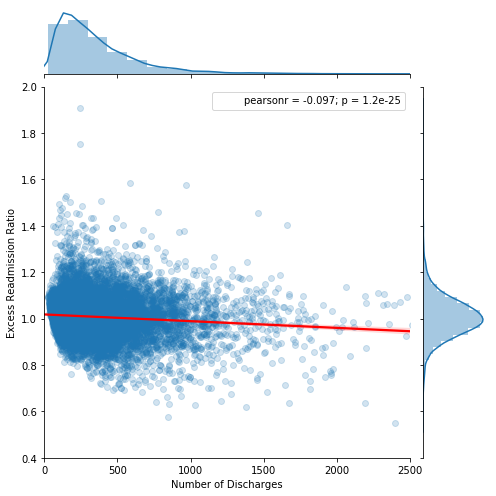

In [11]:
#We need additional libraries
import seaborn as sns
g=sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, kind='reg', size=7, 
              xlim=(0,2500), ylim=(0.4,2.0), joint_kws={'line_kws':{'color':'red'}}, scatter_kws={'alpha': 0.2})
g.annotate(stats.pearsonr)
plt.show()

Apparently, the number of discharge is not normally distributed, we may also transform this data before conducting correlation or further analysis.

**A Violinplot.**  
This plot will show probability density of the variable, at predefined interval/levels. The X axis will be broken down into different intervals of number of discharges and the violinplot is constructed based on these bins. 

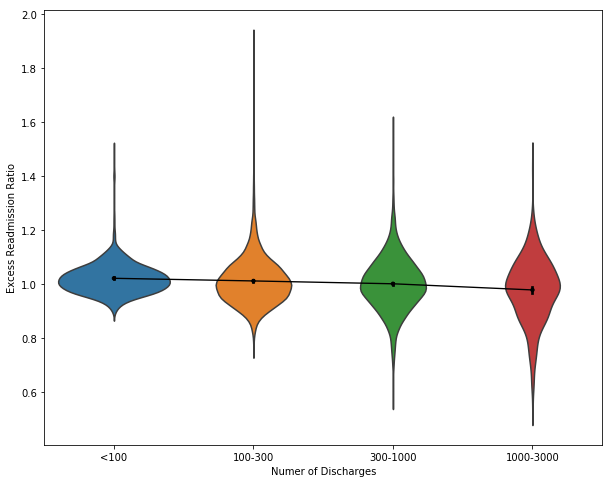

In [12]:
#Construct the bin structure and add a new column for it
bins = [0,100,300,1000,3000]
group_bins = ['<100','100-300','300-1000','1000-3000']
df['discharge-categories'] = pd.cut(df['Number of Discharges'], bins, labels=group_bins)

#Plot violinplot with pointplot overlayed
plt.figure(figsize=(10,8))
ax = sns.violinplot(data=df, x='discharge-categories', y='Excess Readmission Ratio', inner=None)

sns.pointplot(data=df, x='discharge-categories', y='Excess Readmission Ratio', color='black', scale=0.5)

plt.xlabel('Numer of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()

The voilinplot shows the distribution density of readmission rates under each discharge category. The pointplot shows the trend between discharge number and readmission rate.